In [49]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile

zip_file_path = '/content/drive/MyDrive/turkiye-is-bankasi-ml-challenge-5.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
zip_ref.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
import pyarrow.parquet as pq

trainDf = pd.read_parquet('/content/train_final.parquet')
testDf = pd.read_parquet('/content/test_final.parquet')
sample_sub_df = pd.read_parquet('/content/submission_sample_final.parquet')

In [52]:
trainDf = trainDf.drop("id", axis = 1)

In [53]:
carrierDf = trainDf["carrier"]

carriers = {
    'TURKCELL': 0,
    'VODAFONE TR': 1,
    'TURK TELEKOM': 2,
}

encodingCarriers = []

for data in carrierDf:
    numericData = carriers.get(data, 3)
    encodingCarriers.append(numericData)

carriersDf = pd.DataFrame(encodingCarriers)

In [54]:
carriersEncodingDf = pd.concat([trainDf["carrier"], carriersDf], axis=1)
carriersEncodingDf.columns = ["categoric", "numeric"]
carriersEncodingDf

,categoric,numeric
0,VODAFONE TR,1
1,TURKCELL,0
2,TURK TELEKOM,2
3,TURKCELL,0
4,VODAFONE TR,1
...,...,...
94044,O2 - DE,3
94045,TURKCELL,0
94046,VODAFONE TR,1
94047,TURK TELEKOM,2


In [55]:
trainDf["carrier"] = carriersDf
trainDf.head()

,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,10,5245.571,981.182,205.948,1,Apple,-1.197737,1.113360,-1.123334,-0.263580,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,10,5184.876,557.650,487.587,0,samsung,-2.336352,2.567766,-0.494908,0.949101,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,10,3835.618,3275.128,43.806,2,Redmi,-2.561455,2.061736,-0.184511,1.062306,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,10,3532.544,154.509,64.724,0,samsung,-2.529918,3.358050,-0.851366,1.643876,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,10,3344.192,787.896,715.115,1,samsung,-2.922361,2.096124,0.060796,-1.487557,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


In [56]:
devicebrandsDf = trainDf["devicebrand"]

devicebrands = {
    "Apple" : 0,
    "samsung" : 1,
    "Redmi" : 2,
    "HUAWEI" : 3,
    "xiaomi": 4,
    "OPPO" : 5
}

encodingDevicebrands = []

for data in devicebrandsDf:
    numericData = devicebrands.get(data, 6)
    encodingDevicebrands.append(numericData)

devicebrandsDf = pd.DataFrame(encodingDevicebrands)

In [57]:
devicebrandsEncodingDf = pd.concat([trainDf["devicebrand"], devicebrandsDf], axis=1)
devicebrandsEncodingDf.columns = ["categoric", "numeric"]
devicebrandsEncodingDf


,categoric,numeric
0,Apple,0
1,samsung,1
2,Redmi,2
3,samsung,1
4,samsung,1
...,...,...
94044,HUAWEI,3
94045,samsung,1
94046,Apple,0
94047,Redmi,2


In [58]:
trainDf["devicebrand"] = devicebrandsDf
trainDf.head()

,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,10,5245.571,981.182,205.948,1,0,-1.197737,1.113360,-1.123334,-0.263580,...,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,"menu2, menu4, menu5"
1,10,5184.876,557.650,487.587,0,1,-2.336352,2.567766,-0.494908,0.949101,...,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,"menu7, menu8, menu4"
2,10,3835.618,3275.128,43.806,2,2,-2.561455,2.061736,-0.184511,1.062306,...,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,"menu2, menu8, menu4"
3,10,3532.544,154.509,64.724,0,1,-2.529918,3.358050,-0.851366,1.643876,...,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,"menu6, menu2, menu1"
4,10,3344.192,787.896,715.115,1,1,-2.922361,2.096124,0.060796,-1.487557,...,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,"menu6, menu2, menu8"


In [59]:
menu_mapping = {
    'menu1': 1,
    'menu2': 2,
    'menu3': 3,
    'menu4': 4,
    'menu5': 5,
    'menu6': 6,
    'menu7': 7,
    'menu8': 8,
    'menu9': 9,
}
trainDf[['target_1', 'target_2', 'target_3']] = trainDf['target'].str.split(',', expand=True)

trainDf = trainDf.drop('target', axis=1)

trainDf['target_1'] = trainDf['target_1'].str.strip()
trainDf['target_2'] = trainDf['target_2'].str.strip()
trainDf['target_3'] = trainDf['target_3'].str.strip()

trainDf['target_1'] = trainDf['target_1'].replace(menu_mapping)
trainDf['target_2'] = trainDf['target_2'].replace(menu_mapping)
trainDf['target_3'] = trainDf['target_3'].replace(menu_mapping)

In [60]:
trainDf.head()

,month,n_seconds_1,n_seconds_2,n_seconds_3,carrier,devicebrand,feature_0,feature_1,feature_2,feature_3,...,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target_1,target_2,target_3
0,10,5245.571,981.182,205.948,1,0,-1.197737,1.113360,-1.123334,-0.263580,...,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58,2,4,5
1,10,5184.876,557.650,487.587,0,1,-2.336352,2.567766,-0.494908,0.949101,...,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45,7,8,4
2,10,3835.618,3275.128,43.806,2,2,-2.561455,2.061736,-0.184511,1.062306,...,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61,2,8,4
3,10,3532.544,154.509,64.724,0,1,-2.529918,3.358050,-0.851366,1.643876,...,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41,6,2,1
4,10,3344.192,787.896,715.115,1,1,-2.922361,2.096124,0.060796,-1.487557,...,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85,6,2,8


In [61]:
featuresDf = trainDf.iloc[:,6:56]

In [62]:
featuresDf

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,-1.197737,1.113360,-1.123334,-0.263580,2.161242,2.651375,0.810021,1.516175,2.351266,-4.607631,...,0.930440,-2.613336,-2.032903,2.645719,-1.023478,1.658986,-1.559406,-2.161336,30,58
1,-2.336352,2.567766,-0.494908,0.949101,3.567557,3.357848,0.434091,0.885814,1.451937,-3.183905,...,0.815496,-0.983938,-1.453756,-0.021547,-0.195770,2.775513,-0.318980,-4.291473,21,45
2,-2.561455,2.061736,-0.184511,1.062306,4.197788,1.551181,-0.596218,-0.618501,2.017303,-4.631071,...,1.056681,-1.668703,-3.599403,1.673868,0.631790,1.293131,-2.230909,-2.383524,19,61
3,-2.529918,3.358050,-0.851366,1.643876,2.849205,3.887427,1.854521,0.988186,2.065699,-5.803766,...,0.203653,-1.861418,-1.219658,1.863495,0.213170,1.029710,-1.142185,-4.466191,2,41
4,-2.922361,2.096124,0.060796,-1.487557,3.224788,2.091947,-0.992961,0.686043,2.089750,-2.974129,...,2.188403,-0.142903,-1.875545,1.024499,-0.186423,-0.061626,-1.462175,-2.371206,23,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94044,-1.531534,2.596604,0.340233,-1.149720,3.308406,2.995904,1.117685,0.971643,0.281010,-2.138380,...,1.259206,-1.484154,-1.988186,0.044385,0.863442,0.761354,1.073711,-3.560019,29,68
94045,-1.268987,2.300487,0.231711,0.741582,2.365813,2.031927,1.195348,0.209732,0.948406,-4.730049,...,1.067127,-0.632773,-1.624605,2.406462,-0.340132,-0.893553,-2.061401,-1.908158,25,43
94046,-1.950039,2.805681,0.438200,2.976427,4.001829,3.051181,0.431400,1.755406,2.083203,-3.856639,...,2.396198,0.184886,-3.477337,0.449427,0.445361,-0.495204,-0.955097,-3.843092,4,25
94047,-2.389140,2.358281,0.683524,0.234449,4.070453,1.709853,1.140759,0.187314,0.674416,-3.518045,...,1.976830,-0.186062,-2.329308,0.864857,1.284815,-0.100755,-1.056479,-1.452037,25,60


In [63]:
targetsDf = trainDf.iloc[:,56]

In [64]:
targetsDf

0        2
1        7
2        2
3        6
4        6
        ..
94044    2
94045    9
94046    6
94047    6
94048    6
Name: target_1, Length: 94049, dtype: int64

In [65]:
y = targetsDf.values
x = featuresDf.values

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=15)
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [67]:
x_train.shape

(65834, 50)

In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
model = Sequential()

model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))

model.add(Dense(3))

model.compile(optimizer="adam", loss="mse")

In [70]:
earlyStopping = EarlyStopping(monitor="val_loss", mode="auto", verbose=1, patience=25)

In [ ]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=40000, epochs=300, callbacks=[earlyStopping])

<Axes: >

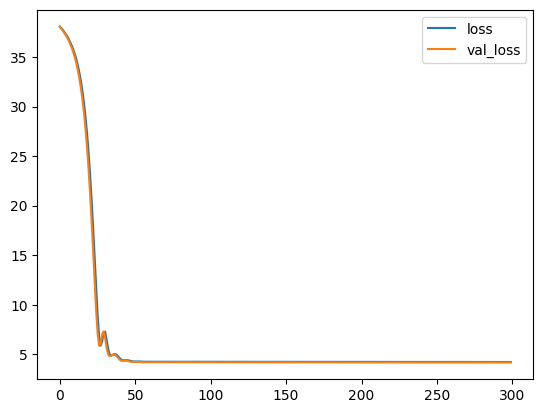

In [72]:
modelKaybı = pd.DataFrame(model.history.history)
modelKaybı.plot()

In [74]:
preds = model.predict(x_test)

882/882 [==============================] - 2s 2ms/step


In [76]:
pd.DataFrame(preds)

,0,1,2
0,5.955951,5.957712,5.957298
1,5.873939,5.874583,5.874426
2,5.995093,5.997387,5.996852
3,5.763326,5.762464,5.762653
4,5.934182,5.935647,5.935302
...,...,...,...
28210,5.740580,5.739408,5.739669
28211,5.847538,5.847823,5.847749
28212,5.582210,5.578884,5.579638
28213,5.748360,5.747296,5.747531
